# 2023

In [160]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
df = pd.read_csv('dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [162]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [164]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [165]:
df['Item'].unique()  

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [166]:
df['Item']=df['Item'].fillna("UNKNOWN")

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [168]:
df.drop('Transaction ID',axis=1,inplace=True)

In [169]:
df.head(1)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08


In [170]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Item              10000 non-null  object
 1   Quantity          9862 non-null   object
 2   Price Per Unit    9821 non-null   object
 3   Total Spent       9827 non-null   object
 4   Payment Method    7421 non-null   object
 5   Location          6735 non-null   object
 6   Transaction Date  9841 non-null   object
dtypes: object(7)
memory usage: 547.0+ KB


In [172]:
df.head(2)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4,3.0,12.0,Cash,In-store,2023-05-16


In [173]:
df['Item']=df['Item'].fillna('UNKNOWN')
df['Payment Method']=df['Payment Method'].fillna('UNKNOWN')
df['Location']=df['Location'].fillna('UNKNOWN')

In [174]:
df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce',downcast='integer')
df['Price Per Unit']=pd.to_numeric(df['Price Per Unit'],errors='coerce')

In [175]:
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean()).astype(int)
df['Price Per Unit']=df['Price Per Unit'].fillna(df['Quantity'].mean())

In [176]:
df.isnull().sum()

Item                  0
Quantity              0
Price Per Unit        0
Total Spent         173
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

In [177]:
df['Total Spent']=pd.to_numeric(df['Total Spent'],errors='coerce')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item              10000 non-null  object 
 1   Quantity          10000 non-null  int64  
 2   Price Per Unit    10000 non-null  float64
 3   Total Spent       9498 non-null   float64
 4   Payment Method    10000 non-null  object 
 5   Location          10000 non-null  object 
 6   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


In [179]:
df['Total Spent']=df['Quantity']*df['Price Per Unit']

In [180]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [181]:
df=df[df['Item']!='UNKNOWN']
df=df[df['Item']!='ERROR']
df

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2,2.0000,4.0000,Credit Card,Takeaway,2023-09-08
1,Cake,4,3.0000,12.0000,Cash,In-store,2023-05-16
2,Cookie,4,1.0000,4.0000,Credit Card,In-store,2023-07-19
3,Salad,2,5.0000,10.0000,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2,2.0000,4.0000,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
9993,Smoothie,2,4.0000,8.0000,Cash,UNKNOWN,2023-10-20
9995,Coffee,2,2.0000,4.0000,UNKNOWN,UNKNOWN,2023-08-30
9997,Coffee,4,2.0000,8.0000,Digital Wallet,UNKNOWN,2023-03-02
9998,Cookie,3,3.0271,9.0813,Digital Wallet,UNKNOWN,2023-12-02


In [182]:
df['Date']=df['Transaction Date'].str.split('-').str[2]
df['Month']=df['Transaction Date'].str.split('-').str[1]
df['Year']=df['Transaction Date'].str.split('-').str[0]

In [183]:
df = df[df['Year']!='ERROR']
df

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Date,Month,Year
0,Coffee,2,2.0000,4.0000,Credit Card,Takeaway,2023-09-08,08,09,2023
1,Cake,4,3.0000,12.0000,Cash,In-store,2023-05-16,16,05,2023
2,Cookie,4,1.0000,4.0000,Credit Card,In-store,2023-07-19,19,07,2023
3,Salad,2,5.0000,10.0000,UNKNOWN,UNKNOWN,2023-04-27,27,04,2023
4,Coffee,2,2.0000,4.0000,Digital Wallet,In-store,2023-06-11,11,06,2023
...,...,...,...,...,...,...,...,...,...,...
9993,Smoothie,2,4.0000,8.0000,Cash,UNKNOWN,2023-10-20,20,10,2023
9995,Coffee,2,2.0000,4.0000,UNKNOWN,UNKNOWN,2023-08-30,30,08,2023
9997,Coffee,4,2.0000,8.0000,Digital Wallet,UNKNOWN,2023-03-02,02,03,2023
9998,Cookie,3,3.0271,9.0813,Digital Wallet,UNKNOWN,2023-12-02,02,12,2023


### total Sales through every item

<Axes: xlabel='Item', ylabel='Total Spent'>

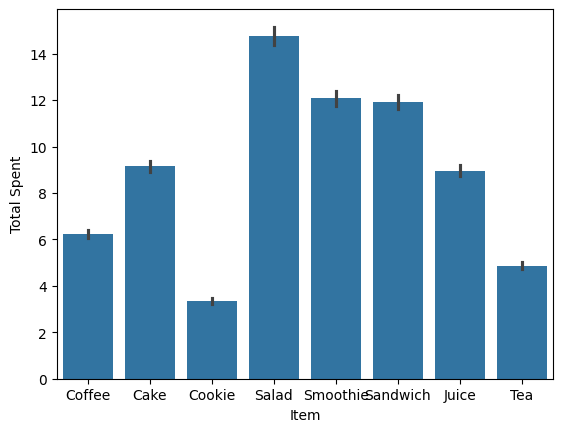

In [184]:
sns.barplot(df, x='Item',y='Total Spent')

Most ordered food in Cafe
1. Salad
2. Smoothie
3. Sandwich
4. Juice

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8901 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item              8901 non-null   object 
 1   Quantity          8901 non-null   int64  
 2   Price Per Unit    8901 non-null   float64
 3   Total Spent       8901 non-null   float64
 4   Payment Method    8901 non-null   object 
 5   Location          8901 non-null   object 
 6   Transaction Date  8758 non-null   object 
 7   Date              8613 non-null   object 
 8   Month             8613 non-null   object 
 9   Year              8758 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 764.9+ KB


### How much Item is sale in Cafe

In [186]:
order_by_item = df.groupby('Item')['Quantity'].sum()
order_by_item

Item
Cake        3407
Coffee      3509
Cookie      3207
Juice       3453
Salad       3429
Sandwich    3355
Smoothie    3315
Tea         3278
Name: Quantity, dtype: int64

([<matplotlib.patches.Wedge at 0x1f25b81a330>,
 [Text(1.0143992302510831, 0.42543413316988343, 'Cake'),
  Text(0.39527989756427717, 1.0265251105460473, 'Coffee'),
  Text(-0.4437489152234729, 1.0065221806984639, 'Cookie'),
  Text(-1.0218245050524228, 0.40727715486431476, 'Juice'),
  Text(-1.0031049969741885, -0.4514203861650615, 'Salad'),
  Text(-0.38460985441644135, -1.0305703565918067, 'Sandwich'),
  Text(0.4487884922452509, -1.0042852628751626, 'Smoothie'),
  Text(1.0206812414437125, -0.4101338846826997, 'Tea')],
 [Text(0.5533086710460453, 0.2320549817290273, '12.64'),
  Text(0.21560721685324208, 0.5599227875705712, '13.02'),
  Text(-0.242044862849167, 0.5490120985627984, '11.90'),
  Text(-0.5573588209376852, 0.2221511753805353, '12.81'),
  Text(-0.5471481801677391, -0.24622930154457898, '12.72'),
  Text(-0.20978719331805892, -0.5621292854137128, '12.45'),
  Text(0.24479372304286412, -0.5477919615682705, '12.30'),
  Text(0.5567352226056613, -0.22370939164510892, '12.16')])

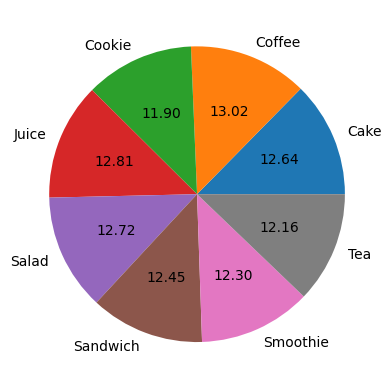

In [187]:
fig, ax = plt.subplots()
ax.pie(order_by_item.values, labels=order_by_item.index, autopct='%.2f')

### By Quantity wise, the sales of all items are near about same.

In [188]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'],errors='coerce')

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\3432829803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'],errors='coerce')


In [189]:
df['Month_name']=df['Transaction Date'].dt.month_name()
df['day_name']=df['Transaction Date'].dt.day_name()

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\1013572510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_name']=df['Transaction Date'].dt.month_name()
C:\Users\parth\AppData\Local\Temp\ipykernel_23584\1013572510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name']=df['Transaction Date'].dt.day_name()


In [190]:
df.dropna(subset=['Transaction Date'],inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\2331430621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Transaction Date'],inplace=True)


In [191]:
df.isnull().sum()

Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Date                0
Month               0
Year                0
Month_name          0
day_name            0
dtype: int64

In [192]:
df.shape

(8613, 12)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item              8613 non-null   object        
 1   Quantity          8613 non-null   int64         
 2   Price Per Unit    8613 non-null   float64       
 3   Total Spent       8613 non-null   float64       
 4   Payment Method    8613 non-null   object        
 5   Location          8613 non-null   object        
 6   Transaction Date  8613 non-null   datetime64[ns]
 7   Date              8613 non-null   object        
 8   Month             8613 non-null   object        
 9   Year              8613 non-null   object        
 10  Month_name        8613 non-null   object        
 11  day_name          8613 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 874.8+ KB


In [194]:

revenue_every_month = df.groupby(df['Month_name'])['Total Spent'].sum()
revenue_every_month

Month_name
April        6468.8306
August       6341.6165
December     6466.3482
February     5962.1558
January      6688.6856
July         6207.9119
June         6683.1978
March        6519.9417
May          6252.1707
November     6487.0894
October      6784.5379
September    6225.9539
Name: Total Spent, dtype: float64

<Axes: xlabel='Month_name', ylabel='Total Spent'>

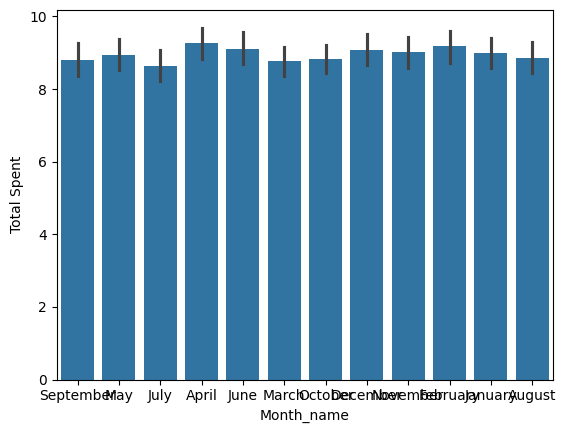

In [195]:
sns.barplot(df,x=df['Month_name'],y=df['Total Spent'])

In [196]:
from ydata_profiling import ProfileReport
import pandas_profiling

In [197]:
profile = ProfileReport(df, title="Report",explorative=True)
profile.to_file('output.pdf')

c:\Users\parth\OneDrive\Desktop\one\pydata\_env\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\parth\OneDrive\Desktop\one\pydata\_env\Lib\site-packages\ydata_profiling\profile_report.py:379: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [198]:
df

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Date,Month,Year,Month_name,day_name
0,Coffee,2,2.0000,4.0000,Credit Card,Takeaway,2023-09-08,08,09,2023,September,Friday
1,Cake,4,3.0000,12.0000,Cash,In-store,2023-05-16,16,05,2023,May,Tuesday
2,Cookie,4,1.0000,4.0000,Credit Card,In-store,2023-07-19,19,07,2023,July,Wednesday
3,Salad,2,5.0000,10.0000,UNKNOWN,UNKNOWN,2023-04-27,27,04,2023,April,Thursday
4,Coffee,2,2.0000,4.0000,Digital Wallet,In-store,2023-06-11,11,06,2023,June,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Smoothie,2,4.0000,8.0000,Cash,UNKNOWN,2023-10-20,20,10,2023,October,Friday
9995,Coffee,2,2.0000,4.0000,UNKNOWN,UNKNOWN,2023-08-30,30,08,2023,August,Wednesday
9997,Coffee,4,2.0000,8.0000,Digital Wallet,UNKNOWN,2023-03-02,02,03,2023,March,Thursday
9998,Cookie,3,3.0271,9.0813,Digital Wallet,UNKNOWN,2023-12-02,02,12,2023,December,Saturday


In [199]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [201]:
columns_to_encode = ['Item', 'Payment Method', 'Location', 'Month_name', 'day_name']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\3554150313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\parth\AppData\Local\Temp\ipykernel_23584\3554150313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\parth\AppData\Local\Temp\ipykernel_23584\3554150313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [202]:
df.drop('Transaction Date', axis=1, inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\833461682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Transaction Date', axis=1, inplace=True)


In [203]:
df.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Date,Month,Year,Month_name,day_name
0,1,2,2.0,4.0,1,2,08,09,2023,11,0
1,0,4,3.0,12.0,0,1,16,05,2023,8,5
2,2,4,1.0,4.0,1,1,19,07,2023,5,6
3,4,2,5.0,10.0,4,3,27,04,2023,0,4
4,1,2,2.0,4.0,2,1,11,06,2023,6,3


In [204]:
df['Year'].unique()

array(['2023'], dtype=object)

In [205]:
df.drop('Year',axis=1,inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_23584\3001728433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Year',axis=1,inplace=True)


In [206]:
df.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Date,Month,Month_name,day_name
0,1,2,2.0,4.0,1,2,08,09,11,0
1,0,4,3.0,12.0,0,1,16,05,8,5
2,2,4,1.0,4.0,1,1,19,07,5,6
3,4,2,5.0,10.0,4,3,27,04,0,4
4,1,2,2.0,4.0,2,1,11,06,6,3


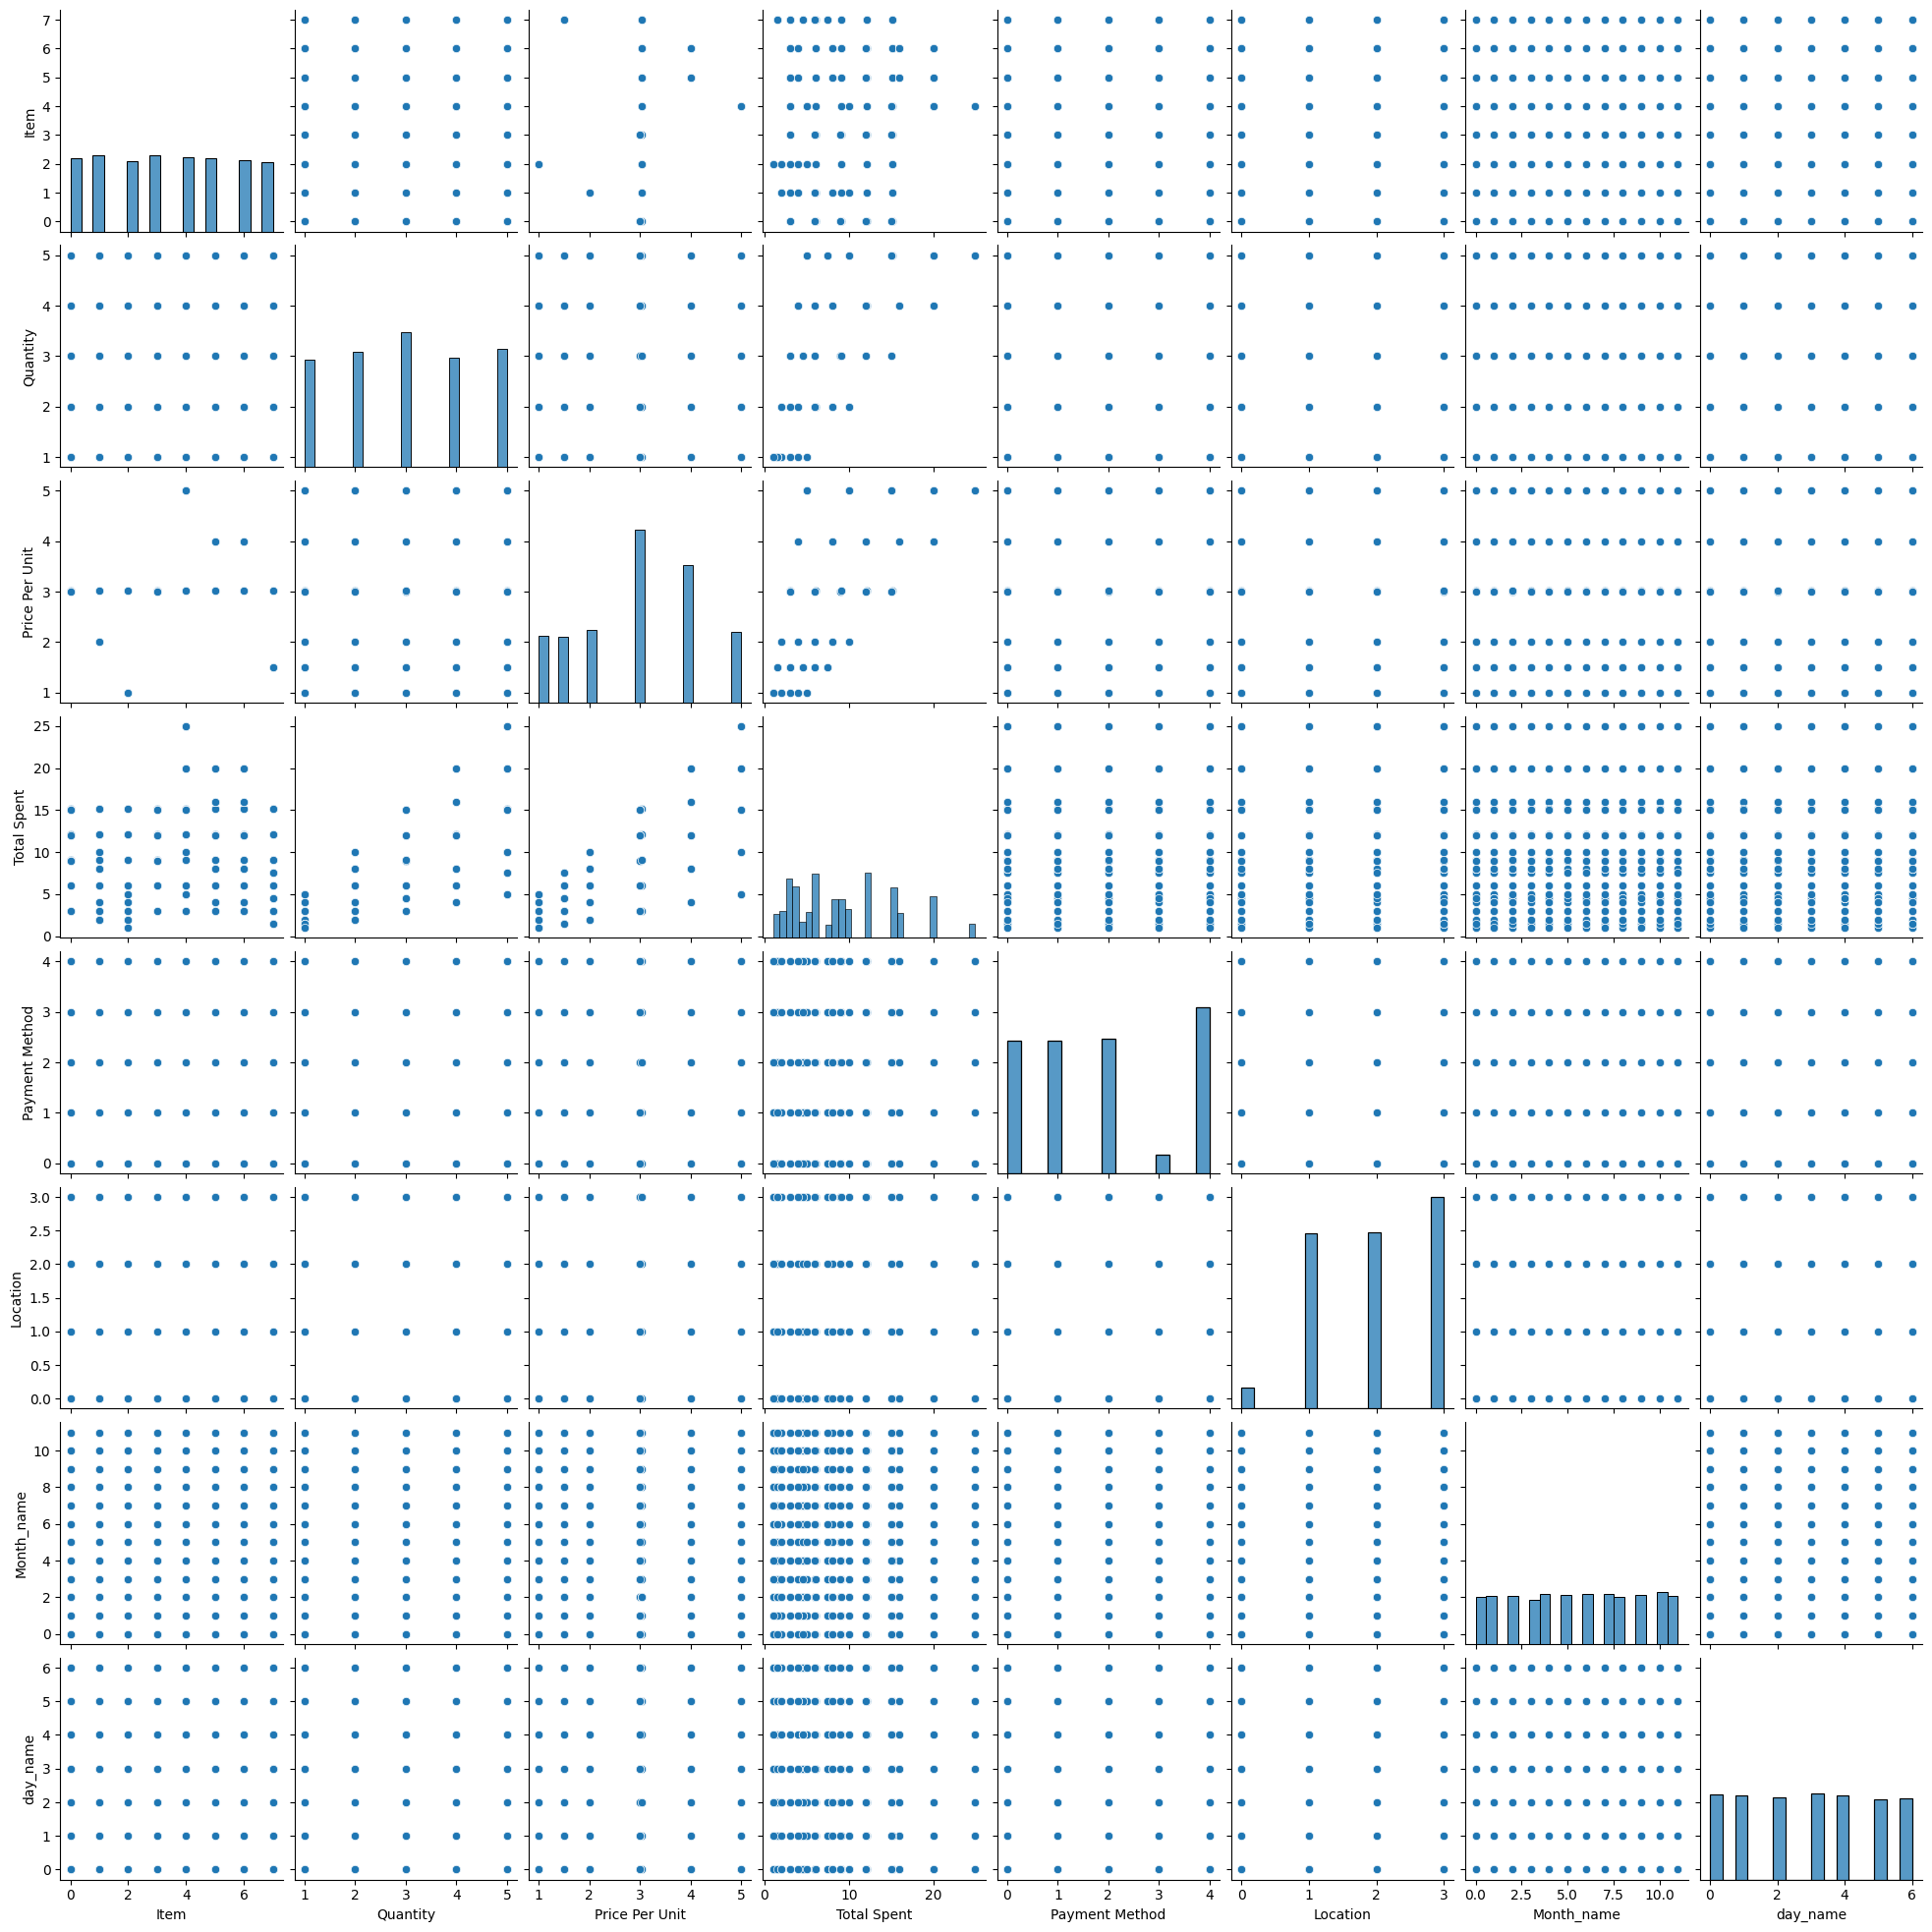

In [207]:
sns.pairplot(df)

In [ ]:
# Define X (features) and y (target)
X = df.drop('Item', axis=1)  # All columns except 'Item'
y = df['Item']  # Just the 'Item' column

In [212]:
X

,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Date,Month,Month_name,day_name
0,2,2.0000,4.0000,1,2,08,09,11,0
1,4,3.0000,12.0000,0,1,16,05,8,5
2,4,1.0000,4.0000,1,1,19,07,5,6
3,2,5.0000,10.0000,4,3,27,04,0,4
4,2,2.0000,4.0000,2,1,11,06,6,3
...,...,...,...,...,...,...,...,...,...
9993,2,4.0000,8.0000,0,3,20,10,10,0
9995,2,2.0000,4.0000,4,3,30,08,1,6
9997,4,2.0000,8.0000,2,3,02,03,7,4
9998,3,3.0271,9.0813,2,3,02,12,2,2


In [213]:
y

0       1
1       0
2       2
3       4
4       1
       ..
9993    6
9995    1
9997    1
9998    2
9999    5
Name: Item, Length: 8613, dtype: int64

In [215]:
X.shape

(8613, 9)

In [216]:
y.shape

(8613,)

In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33, random_state=42)

In [219]:
X_train.shape

(5770, 9)

In [220]:
X_test.shape

(2843, 9)

In [221]:
y_train.shape

(5770,)

In [222]:
y_test.shape

(2843,)

In [223]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [224]:
X_train

array([[ 1.42509367,  0.03213799,  1.03993773, ..., -1.60285631,
        -0.44674358, -1.48742093],
       [-0.73917826, -0.77229561, -0.84907686, ..., -1.02226804,
         0.42420263,  0.01230276],
       [ 0.70366969,  0.83657159,  1.21166633, ..., -1.60285631,
        -0.44674358, -0.48760514],
       ...,
       [-0.01775428, -1.57672921, -1.02080546, ..., -0.44167976,
         0.71451803,  0.51221066],
       [ 0.70366969, -1.57672921, -0.84907686, ...,  0.42920265,
        -1.3176898 , -0.98751303],
       [-0.73917826,  0.83657159, -0.16216247, ..., -1.60285631,
        -0.44674358,  0.01230276]], shape=(5770, 9))

In [225]:
X_test

array([[-0.01775428,  0.83657159,  0.52475193, ...,  1.00979092,
         1.29514884, -1.48742093],
       [-0.01775428, -0.77229561, -0.50561966, ...,  0.13890851,
        -0.15642818, -0.48760514],
       [-0.01775428, -0.77229561, -0.50561966, ..., -0.44167976,
         0.71451803,  1.01211855],
       ...,
       [ 1.42509367, -0.77229561,  0.18129473, ..., -1.31256218,
        -0.73705899,  0.51221066],
       [-0.01775428,  0.03213799,  0.00956613, ..., -1.02226804,
         0.42420263, -1.48742093],
       [ 0.70366969,  0.83657159,  1.21166633, ...,  0.13890851,
        -0.15642818, -0.48760514]], shape=(2843, 9))

In [226]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8
0,1.425094,0.032138,1.039938,1.375591,0.005968,1.281850,-1.602856,-0.446744,-1.487421
1,-0.739178,-0.772296,-0.849077,1.375591,-1.104771,0.371987,-1.022268,0.424203,0.012303
2,0.703670,0.836572,1.211666,-0.610354,-1.104771,0.599453,-1.602856,-0.446744,-0.487605
3,-0.017754,1.641005,1.039938,-0.610354,1.116706,-1.561471,-0.731974,-1.608005,0.012303
4,-0.739178,1.641005,0.181295,-0.610354,1.116706,-0.310410,-1.022268,0.424203,-0.987513
...,...,...,...,...,...,...,...,...,...
5765,1.425094,-0.772296,0.181295,-0.610354,1.116706,-0.082944,-1.022268,0.424203,1.512026
5766,-0.017754,-1.576729,-1.020805,1.375591,0.005968,-0.765341,-0.441680,0.714518,1.012119
5767,-0.017754,-1.576729,-1.020805,-0.610354,1.116706,1.054384,-0.441680,0.714518,0.512211
5768,0.703670,-1.576729,-0.849077,-1.272336,1.116706,-0.992807,0.429203,-1.317690,-0.987513


In [227]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8
0,-0.017754,0.836572,0.524752,-0.610354,-1.104771,-1.106540,1.009791,1.295149,-1.487421
1,-0.017754,-0.772296,-0.505620,-0.610354,1.116706,0.713186,0.138909,-0.156428,-0.487605
2,-0.017754,-0.772296,-0.505620,-0.610354,0.005968,0.030789,-0.441680,0.714518,1.012119
3,0.703670,0.032138,0.524752,1.375591,0.005968,-0.310410,-0.731974,-1.608005,0.512211
4,1.425094,-1.576729,-0.677348,1.375591,-1.104771,0.144522,0.429203,-1.317690,0.512211
...,...,...,...,...,...,...,...,...,...
2838,-1.460602,0.032138,-1.020805,0.051628,-1.104771,0.826918,1.300085,1.004833,0.512211
2839,-0.017754,0.032138,0.009566,1.375591,1.116706,1.168117,-0.731974,-1.608005,1.512026
2840,1.425094,-0.772296,0.181295,1.375591,0.005968,-0.765341,-1.312562,-0.737059,0.512211
2841,-0.017754,0.032138,0.009566,-0.610354,-1.104771,-1.447738,-1.022268,0.424203,-1.487421
